## 4.10 - Charts

### Contents
01 Import Libraries and Data

02 Bar Chart - Orders by Day of Week

03 Bar Chart - Orders by Hour of Day

04 Line Chart on Subset - Prices by Hour of Day

05 Histogram - Price

06 Horizontal Bar Chart - Price Range Grouping

07 Horizontal Bar Chart - Product Popularity

08 Bar Chart - Customer Loyalty Distribution

09 Bar Chart - Orders by Loyalty Status 

10 Bar Chart - Orders by Region

11 Stacked Bar - Goods Sold by Region 

12 Scatterplot - Age and Income

### 01 Import Libraries and Data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path variable for main project folder
path = r'D:\JupyterProjects\06-2022 Instacart Basket Analysis'

In [3]:
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'final_profile.pkl'))

### 02 Bar Chart - Orders by Day of Week

In [4]:
# Create dataframe for orders
orders = df.drop_duplicates(subset='order_id')
orders.shape

(3064375, 39)

In [5]:
# Map days 0-6 to days Sat-Fri
day_label = pd.DataFrame(data={'days':['Sat', 'Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri']})

Text(0.5, 1.0, 'Orders by Day of Week')

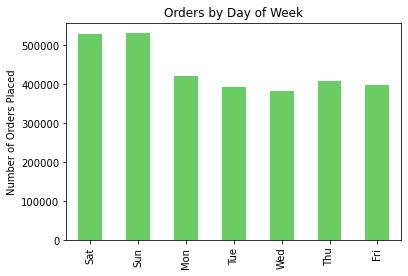

In [6]:
# Orders placed on each day of the week
data = orders['orders_day_of_week'].value_counts().sort_index(ascending=True).to_frame()
data = data.merge(day_label, how='inner', left_index=True, right_index=True).set_index('days')
bar_dow = data.plot.bar(color = sns.color_palette("muted")[2], 
                         legend=None)
plt.xlabel('')
plt.ylabel('Number of Orders Placed')
plt.title('Orders by Day of Week')

In [7]:
# Export bar chart
bar_dow.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_orders_dow_ex.png'))

### 03 Bar Chart - Orders by Hour of Day

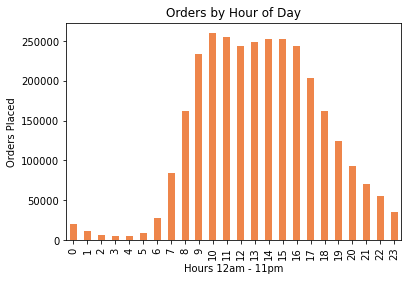

In [48]:
# Orders by Hour of Day
data = orders['order_hour_of_day'].value_counts().sort_index()
bar_hod = data.plot.bar(ylabel='Orders Placed', color = ['#ee854a'],
                                xlabel='Hours 12am - 11pm', 
                                title='Orders by Hour of Day')

In [9]:
# Export bar chart
bar_hod.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_hod_ex.png'))

### 04 Line Chart on Subset - Prices by Hour of Day

In [10]:
# Set random seed
np.random.seed(4)

In [11]:
# Create list to store Boolean values
dev = np.random.rand(len(df)) <= 0.7

In [12]:
# Create 70% dataframe
big = df[dev]

In [13]:
# Create 30% dataframe
small = df[~dev]

In [14]:
# Check size
len(df)

30964564

In [15]:
# Confirm subset sizes
len(big) + len(small)

30964564

In [16]:
# Reduce small dataframe to only columns needed for chart
df_line = small[['order_hour_of_day','prices']]

Text(0.5, 1.0, 'Customer Spending by Hour of Day')

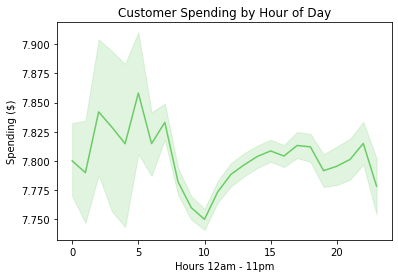

In [17]:
line_ohd_price = sns.lineplot(data = df_line, x = 'order_hour_of_day', y = 'prices', color = '#6acc64')

line_ohd_price.set_xlabel('Hours 12am - 11pm')
line_ohd_price.set_ylabel('Spending ($)')
line_ohd_price.set_title('Customer Spending by Hour of Day')

In [18]:
# Export line chart
line_ohd_price.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_ohd_price_ex.png'))

### 05 Histogram - Price

Text(0.5, 1.0, 'Product Price Frequency')

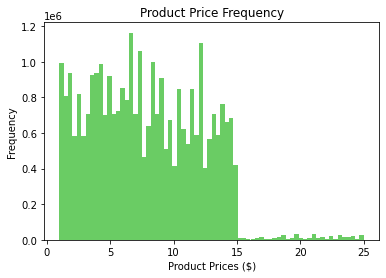

In [19]:
# Histogram
histogram_ex = df['prices'].plot.hist(bins=70, color='#6acc64')

plt.xlabel('Product Prices ($)')
plt.ylabel('Frequency')
plt.title('Product Price Frequency')

In [20]:
# Export histogram chart
histogram_ex.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'histogram_ex.png'))

### 06 Horizontal Bar Chart - Price Range Grouping

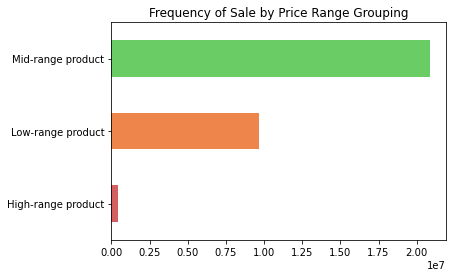

In [21]:
bar_price_range = df['price_range_loc'].value_counts().sort_index().plot.barh(title= 'Frequency of Sale by Price Range Grouping', color = ['#d65f5f', '#ee854a', '#6acc64'])

In [22]:
# Export horizontal bar chart
bar_price_range.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_price_range_ex.png'))

### 07 Horizontal Bar Chart - Product Popularity

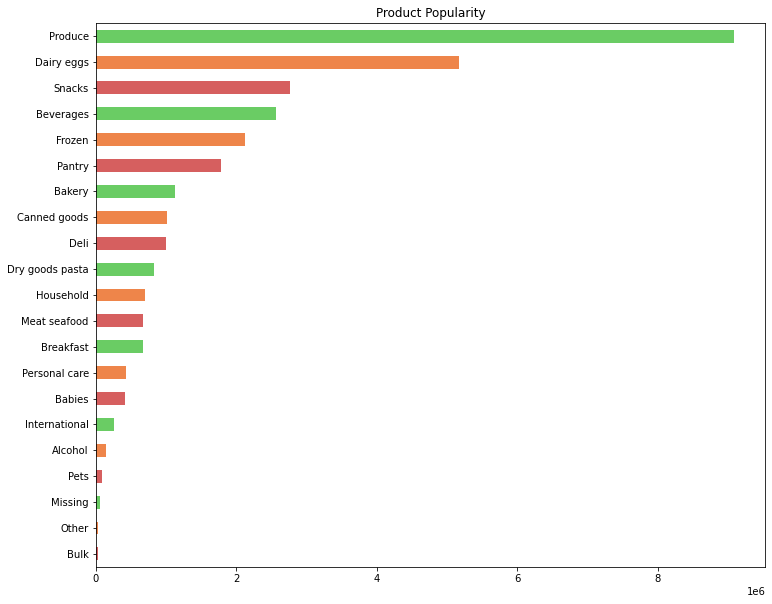

In [23]:
# Bar chart showing the orders made for each department
department_bar = df.goods.value_counts().sort_values().plot(kind = 'barh', title = 'Product Popularity', color=['#d65f5f', '#ee854a', '#6acc64'], figsize=[12,10])

In [24]:
# Export horizontal bar chart
department_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'department_bar_ex.png'))

### 08 Bar Chart - Customer Loyalty

In [25]:
# Create customers dataframe
customers = df.drop_duplicates(subset=['user_id'])
customers.shape

(162631, 39)

In [26]:
customers['loyalty_flag'].value_counts()

Regular customer    76864
New customer        68750
Loyal customer      17017
Name: loyalty_flag, dtype: int64

In [27]:
# Calculating percentages
76864/162631*100, 68750/162631*100, 17017/162631*100

(47.2628219712109, 42.27361327176246, 10.463564757026642)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

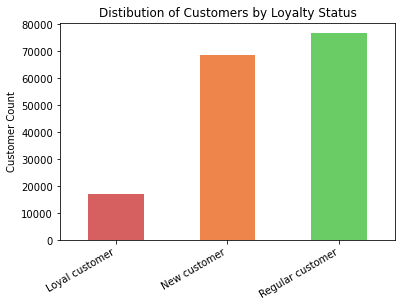

In [28]:
# Distribution of customers by loyalty status
data = customers['loyalty_flag'].value_counts().sort_index()
bar_loyalty_customers = data.plot.bar(color = ['#d65f5f', '#ee854a', '#6acc64'],
                                      legend=None, ylabel='Customer Count', title='Distibution of Customers by Loyalty Status')

plt.xticks(rotation=30, horizontalalignment='right')

In [29]:
# Export bar chart
bar_loyalty_customers.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_cust_ex.png'))

### 09 Bar Chart - Orders by Loyalty Status

In [30]:
# Create orders dataframe
orders = df.drop_duplicates(subset=['order_id'])
orders.shape

(3064375, 39)

In [31]:
orders['loyalty_flag'].value_counts()

Regular customer    1553120
Loyal customer      1024517
New customer         486738
Name: loyalty_flag, dtype: int64

In [32]:
# Calculating percentages
1553120/3064375 * 100, 1024517/3064375 *100, 486738/3064375 * 100

(50.683091984499285, 33.4331470528248, 15.883760962675913)

(array([0, 1, 2]),
 [Text(0, 0, 'Loyal customer'),
  Text(1, 0, 'New customer'),
  Text(2, 0, 'Regular customer')])

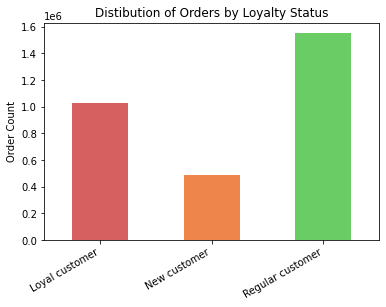

In [33]:
# Distribution of orders by loyalty status
data = orders['loyalty_flag'].value_counts().sort_index()
bar_loyalty_orders = data.plot.bar(color = ['#d65f5f', '#ee854a', '#6acc64'],
                                      legend=None, ylabel='Order Count', title='Distibution of Orders by Loyalty Status')

plt.xticks(rotation=30, horizontalalignment='right')

In [34]:
# Export bar chart
bar_loyalty_orders.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyal_ord_ex.png'))

### 10 Bar Chart - Orders by Region

(array([0, 1, 2, 3]),
 [Text(0, 0, 'South'),
  Text(1, 0, 'West'),
  Text(2, 0, 'Midwest'),
  Text(3, 0, 'Northeast')])

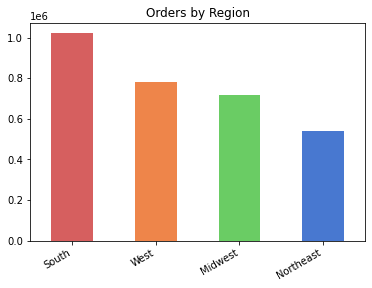

In [35]:
regional_bar = orders['region'].value_counts().plot.bar(color = ['#d65f5f', '#ee854a', '#6acc64', '#4878d0'], title = 'Orders by Region')

plt.xticks(rotation=30, horizontalalignment='right')

In [36]:
# Export bar chart
regional_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_bar_ex.png'))

In [37]:
# Check count of customers by region
customers['region'].value_counts(dropna = False)

South        54193
West         41481
Midwest      38376
Northeast    28581
Name: region, dtype: int64

###  11 Stacked Bar - Goods Sold by Region 

In [38]:
# Create income region/goods crosstab
reg_goods_cross = pd.crosstab(df['goods'], df['region'], dropna = False)

In [39]:
reg_goods_cross

region,Midwest,Northeast,South,West
goods,,,,
Alcohol,34043,25017,48813,36754
Babies,95741,72712,139511,102428
Bakery,261753,199300,371620,288155
Beverages,598979,462929,859419,650574
Breakfast,156155,117904,223172,173619
Bulk,7929,5599,11180,8743
Canned goods,237459,176936,337458,260221
Dairy eggs,1212490,914616,1723016,1327060
Deli,234464,178398,333620,257352


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Alcohol'),
  Text(1, 0, 'Babies'),
  Text(2, 0, 'Bakery'),
  Text(3, 0, 'Beverages'),
  Text(4, 0, 'Breakfast'),
  Text(5, 0, 'Bulk'),
  Text(6, 0, 'Canned goods'),
  Text(7, 0, 'Dairy eggs'),
  Text(8, 0, 'Deli'),
  Text(9, 0, 'Dry goods pasta'),
  Text(10, 0, 'Frozen'),
  Text(11, 0, 'Household'),
  Text(12, 0, 'International'),
  Text(13, 0, 'Meat seafood'),
  Text(14, 0, 'Missing'),
  Text(15, 0, 'Other'),
  Text(16, 0, 'Pantry'),
  Text(17, 0, 'Personal care'),
  Text(18, 0, 'Pets'),
  Text(19, 0, 'Produce'),
  Text(20, 0, 'Snacks')])

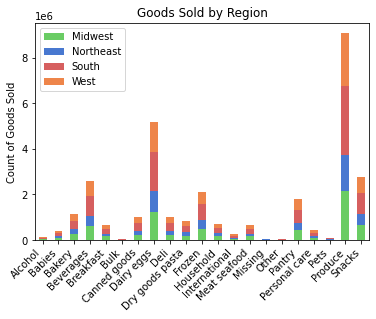

In [40]:
reg_goods_stack = reg_goods_cross.plot(kind = 'bar', stacked = True, color = ['#6acc64', '#4878d0', '#d65f5f', '#ee854a'])

plt.legend(loc="upper left", ncol=1)
plt.ylabel("Count of Goods Sold")
plt.xlabel('')
plt.title('Goods Sold by Region')
plt.xticks(rotation = 45 , horizontalalignment='right')

In [41]:
# Export stacked bar chart
reg_goods_stack.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'reg_goods_ex.png'))

### 12 Scatterplot - Age and Income

[Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Income ($)'),
 Text(0.5, 1.0, 'Relationship between Age and Income')]

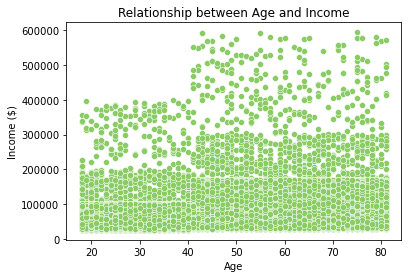

In [44]:
# Create scatterplot
scatterplot = sns.scatterplot(x = 'age', y = 'income', data = customers, color = ['#8acc64'])
scatterplot.set(xlabel = 'Age', ylabel = 'Income ($)', title = 'Relationship between Age and Income')

In [45]:
# Export scatterplot chart
scatterplot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'scatterplot_ex.png'))